In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

# Create parameters

In [2]:
ms = [20,30,40,25,35] 
ns = [30,40,25,35,20]
params = ob.sc_params(ms, ns)

# Distributed solution with limited memory $m$

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 200
memory = [20, 50, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=-2089.932345023244, U=7206.833811965411
k=1, rel_gap=inf, L=-1429.5456654385507, U=5611.084506653395
k=2, rel_gap=inf, L=-1389.7028923628254, U=3257.5881625246593
k=3, rel_gap=inf, L=-1353.63992821076, U=2501.2536778259678
k=4, rel_gap=inf, L=-977.3396996333131, U=1489.5417121352625
k=5, rel_gap=inf, L=-740.6158047018007, U=826.6816922967614
k=6, rel_gap=inf, L=-656.6450859657753, U=432.896733152518
k=7, rel_gap=inf, L=-631.2304335884551, U=294.84507460441137
k=8, rel_gap=inf, L=-559.8126362913792, U=220.10598234977533
k=9, rel_gap=inf, L=-418.4076704136835, U=100.49307700307168
k=10, rel_gap=inf, L=-381.4554440438353, U=22.29834213394679
k=11, rel_gap=inf, L=-350.1377327554362, U=18.323053292010854
k=12, rel_gap=inf, L=-260.619522155622, U=13.49374543373267
k=13, rel_gap=11.868506198062407, L=-241.7041523328262, U=-18.782611486733344
k=14, rel_gap=9.323337253845388, L=-227.12474349716717, U=-22.00109692362946
k=15, rel_gap=5.82484011232651, L=-215.2517058884348, U=

k=109, rel_gap=1.1005942546294685, L=-183.32156278374305, U=-87.27128638942213
k=110, rel_gap=1.0322640302791235, L=-177.35829620541062, U=-87.27128638942213
k=111, rel_gap=0.7768585816224612, L=-155.0687341502762, U=-87.27128638942213
k=112, rel_gap=0.7489192520611053, L=-152.63043291859867, U=-87.27128638942213
k=113, rel_gap=0.5926328501854082, L=-138.9911175817324, U=-87.27128638942213
k=114, rel_gap=0.6124366525834986, L=-140.71942089241566, U=-87.27128638942213
k=115, rel_gap=0.491621272038109, L=-130.17570721659195, U=-87.27128638942213
k=116, rel_gap=0.28657220199297606, L=-112.28081110079847, U=-87.27128638942213
k=117, rel_gap=0.27291208866740013, L=-111.08867543865017, U=-87.27128638942213
k=118, rel_gap=0.2673794591583301, L=-110.60583574427756, U=-87.27128638942213
k=119, rel_gap=0.23664380095846713, L=-107.92349531514992, U=-87.27128638942213
k=120, rel_gap=0.22505032348727028, L=-106.91171762251179, U=-87.27128638942213
k=121, rel_gap=0.20983729548029392, L=-105.58405709

k=16, rel_gap=3.3459091794268225, L=-208.45952344680882, U=-47.96683843133195
k=17, rel_gap=3.221620095457373, L=-202.49776903726797, U=-47.96683843133195
k=18, rel_gap=2.714923644751393, L=-186.32837904797645, U=-50.156718378648065
k=19, rel_gap=2.5741324975922115, L=-182.51575297559134, U=-51.06574898903352
k=20, rel_gap=2.2590753994672306, L=-169.93533617157868, U=-52.14219229151877
k=21, rel_gap=1.5083579735971606, L=-149.1161272185975, U=-59.447705944759775
k=22, rel_gap=1.0420410782972291, L=-145.7730566082589, U=-71.38595700034244
k=23, rel_gap=0.9993382901377428, L=-142.7246772089111, U=-71.38595700034244
k=24, rel_gap=0.8777427319695571, L=-138.20765850389853, U=-73.60308531666266
k=25, rel_gap=0.8310117525840914, L=-134.7681142412589, U=-73.60308531666266
k=26, rel_gap=0.7418484658688452, L=-128.20542124204258, U=-73.60308531666266
k=27, rel_gap=0.6046297698198106, L=-126.24972431594938, U=-78.67841335769708
k=28, rel_gap=0.5653454957433094, L=-125.43186131408925, U=-80.13046

k=121, rel_gap=0.024814593106900977, L=-89.59821220284084, U=-87.4287044754198
k=122, rel_gap=0.023652883113884894, L=-89.5067670631297, U=-87.43859226074369
k=123, rel_gap=0.020891317525314642, L=-89.2652996556294, U=-87.43859226074369
k=124, rel_gap=0.01957807950742806, L=-89.15734365325625, U=-87.44533199098333
k=125, rel_gap=0.017726189102719562, L=-88.9954044820056, U=-87.44533199098333
k=126, rel_gap=0.01663429471210876, L=-88.91006319985217, U=-87.45530586790778
k=127, rel_gap=0.016558136486555908, L=-88.9034027589421, U=-87.45530586790778
k=128, rel_gap=0.016016262139804865, L=-88.85601297220501, U=-87.45530586790778
k=129, rel_gap=0.014496787122395596, L=-88.72312681979884, U=-87.45530586790778
k=130, rel_gap=0.012896995930312818, L=-88.58321659177045, U=-87.45530586790778
k=131, rel_gap=0.011712153647439333, L=-88.47959584751652, U=-87.45530586790778
k=132, rel_gap=0.01091071730697827, L=-88.42354823821051, U=-87.46919656145991
k=133, rel_gap=0.009629879440438117, L=-88.31151

k=28, rel_gap=0.5653454957433094, L=-125.43186131408925, U=-80.13046426822694
k=29, rel_gap=0.5218294130674084, L=-122.28905329533382, U=-80.35661043562516
k=30, rel_gap=0.44448628135226836, L=-116.07402139022906, U=-80.35661043562516
k=31, rel_gap=0.42714863485544174, L=-114.83079755721451, U=-80.4616945654339
k=32, rel_gap=0.39778571554972253, L=-113.42696051725602, U=-81.14760313790111
k=33, rel_gap=0.3800191340399787, L=-112.48840117924556, U=-81.51220400106916
k=34, rel_gap=0.34038443537338736, L=-109.25768953601346, U=-81.51220400106916
k=35, rel_gap=0.2767450684335852, L=-104.62611371529829, U=-81.94753698454628
k=36, rel_gap=0.24142590232305222, L=-103.48961001298221, U=-83.36350145371097
k=37, rel_gap=0.21634473629473513, L=-102.35980130896394, U=-84.15361061270784
k=38, rel_gap=0.20517807146323197, L=-101.420086144891, U=-84.15361061270784
k=39, rel_gap=0.19577800323015515, L=-100.62903646307177, U=-84.15361061270784
k=40, rel_gap=0.19261523789694088, L=-100.36287834076109, U

k=133, rel_gap=0.006538142658665539, L=-88.0459913042348, U=-87.47407333384356
k=134, rel_gap=0.006484647446314535, L=-88.0446849350983, U=-87.47742467655928
k=135, rel_gap=0.0060961401249345, L=-88.01069931515599, U=-87.47742467655928
k=136, rel_gap=0.006031784080338464, L=-88.00506961411236, U=-87.47742467655928
k=137, rel_gap=0.005820846682876175, L=-87.98661735381438, U=-87.47742467655928
k=138, rel_gap=0.005809590789274707, L=-87.98563271722969, U=-87.47742467655928
k=139, rel_gap=0.005778202718840605, L=-87.98393029825047, U=-87.47846201121726
k=140, rel_gap=0.005431917662639372, L=-87.95363781411652, U=-87.47846201121726
k=141, rel_gap=0.0052724863793117294, L=-87.93969101065454, U=-87.47846201121726
k=142, rel_gap=0.005185157935203143, L=-87.93205165267409, U=-87.47846201121726
k=143, rel_gap=0.005014532414489515, L=-87.9171255945422, U=-87.47846201121726
k=144, rel_gap=0.004956599982737014, L=-87.91205775451192, U=-87.47846201121726
k=145, rel_gap=0.004952374277442886, L=-87.9

# Centralized solution

In [3]:
h_cvx = ob.cvx_supply_chain(params=params)[0]

# Plot

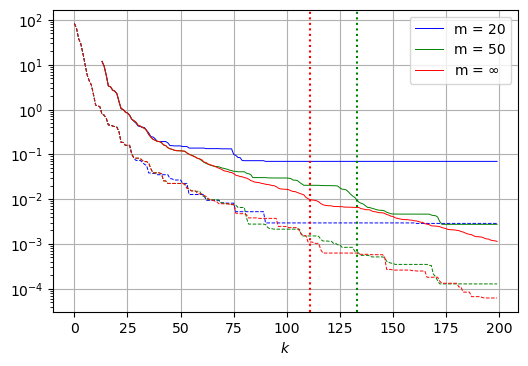

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)